In [1]:
import graph_tool.all as gt
from sbm import sbm
import matplotlib.pyplot as plt
import numpy as np
import os
# from sbmtm import sbmtm



(ipykernel_launcher.py:40692): Gtk-WARNING **: 09:04:08.971: Locale not supported by C library.
	Using the fallback 'C' locale.


model minimized


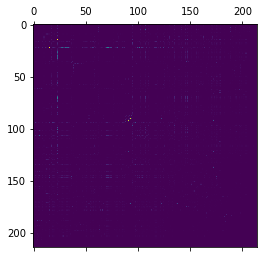

experiment 56115nested_noDegCorr_noDemNoEq done


In [35]:
model = sbm()
# patient_num = 115
patient_num = 56115
# patient_num = 10000

experimentName = str(patient_num)+"nested_noDegCorr_noDem" 
experimentName += "NoEq"
model.setOuputLoc(experimentName)

model.make_graph(patient_num=patient_num, age=False,gender=False,ethnicity=False)
model.save_graph()

model.fit(multilayer=False,deg_corr=False)
print("experiment "+ experimentName+ " done")

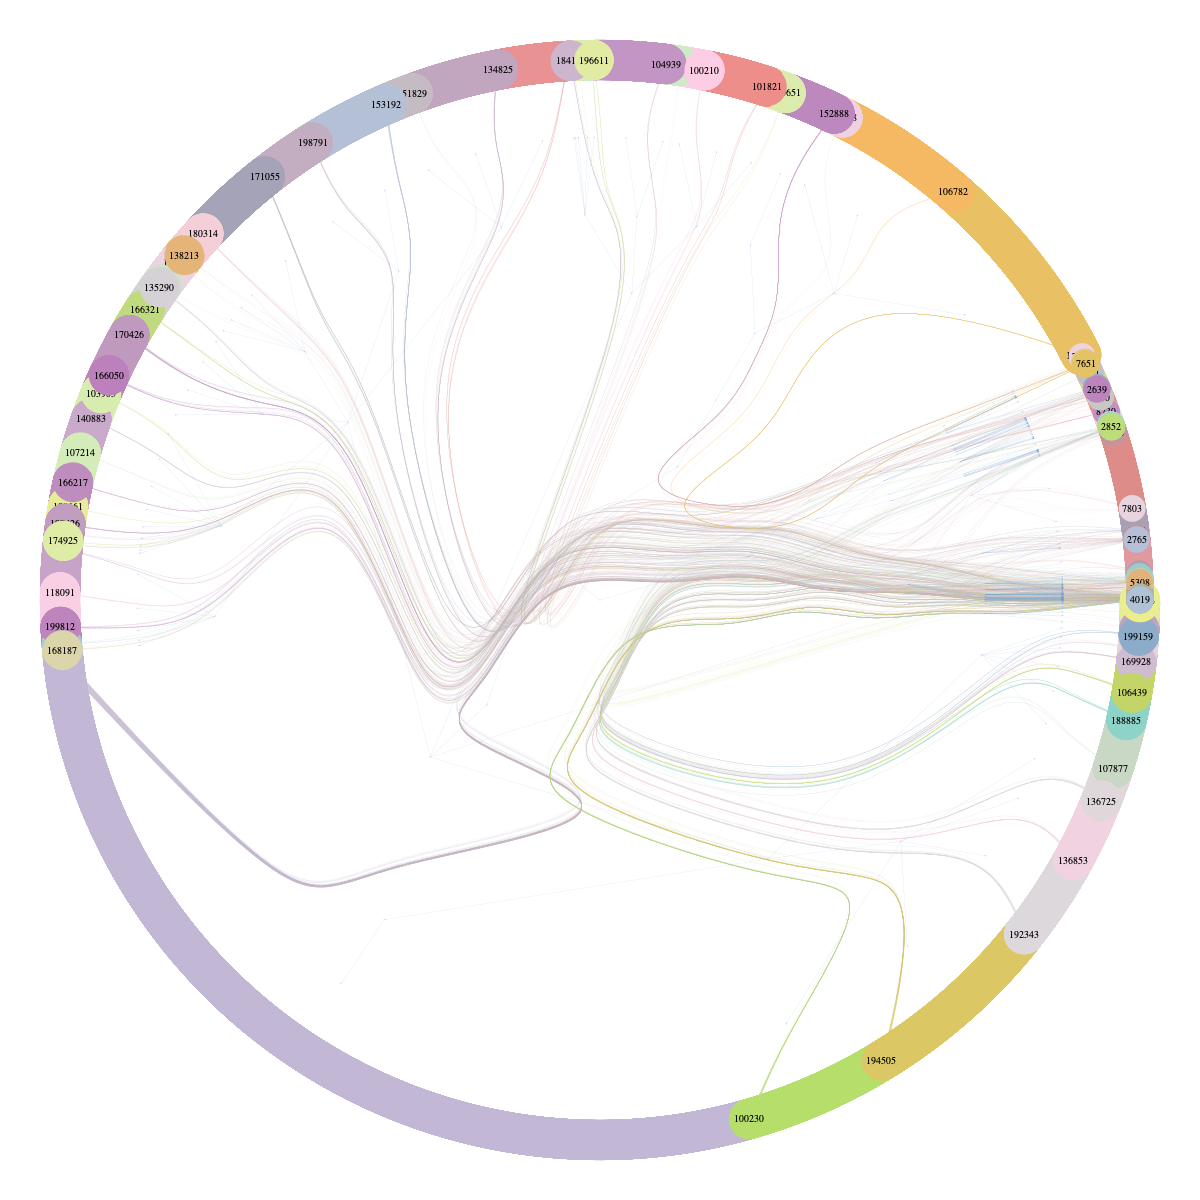

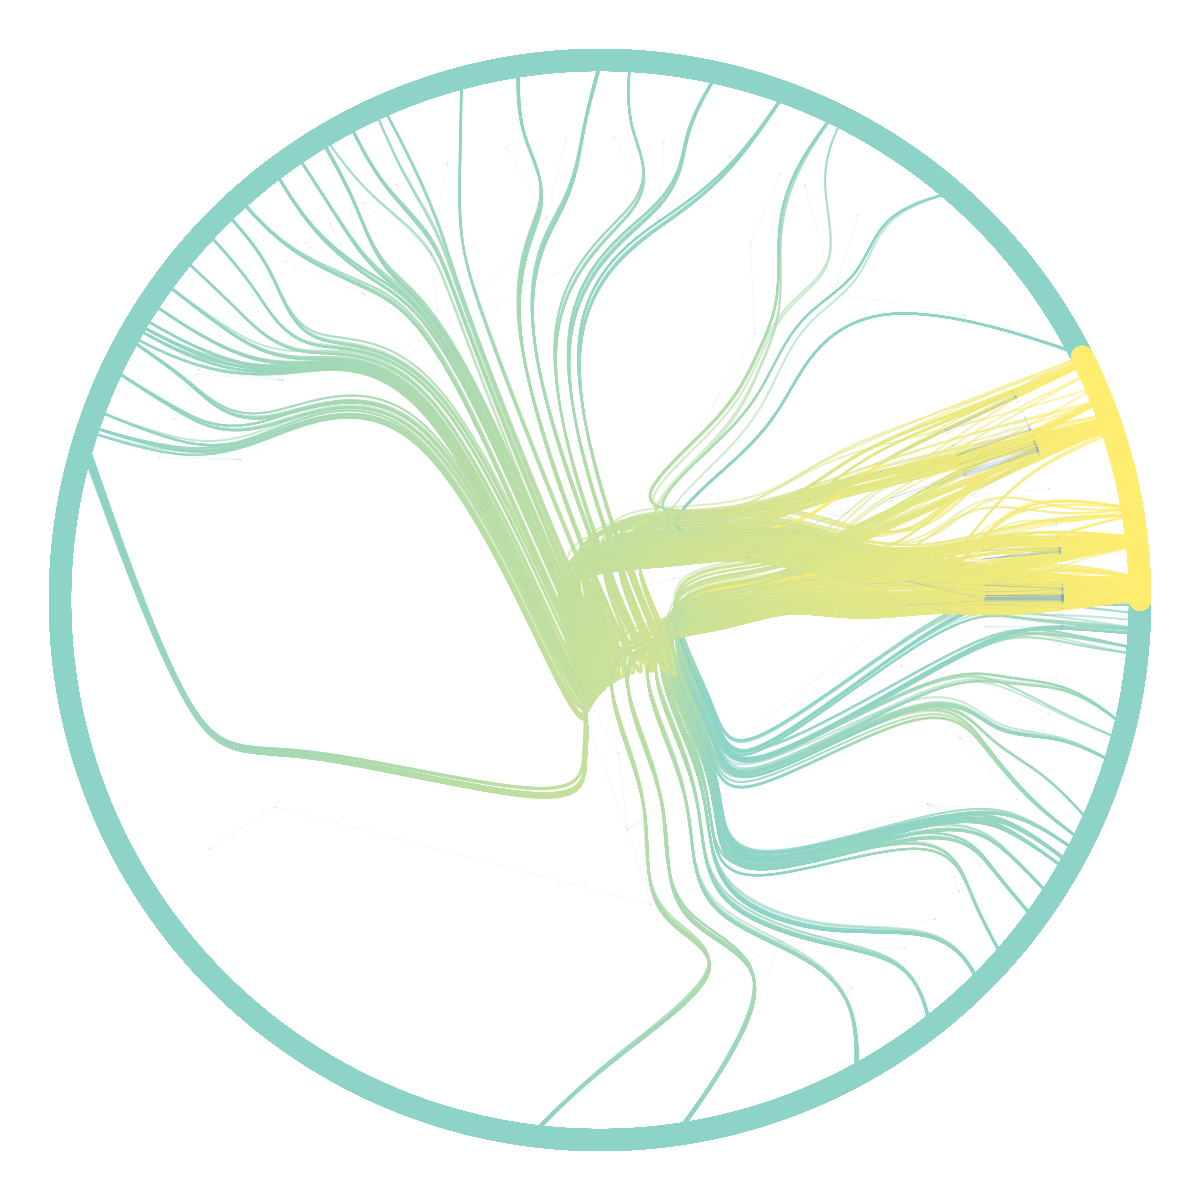

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ecf1520, at 0x16ed55940>,
 <Graph object, directed, with 47793 vertices and 47792 edges, at 0x16ef45100>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ef45100, at 0x16ed55100>)

In [162]:
gt.draw_hierarchy(model.state, subsample_edges=1000,vertex_text=model.g.vp['name'],vertex_font_size= 5,bg_color='w')
gt.draw_hierarchy(model.state, subsample_edges=1000,bg_color='w',vertex_color=model.g.vp.kind,vertex_size=10,vertex_fill_color=model.g.vp.kind)



model minimized


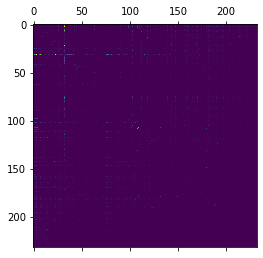

experiment 56115nested_noDegCorr_DemNoEq done


In [163]:
model1 = sbm()
# patient_num = 115
patient_num = 56115
# patient_num = 10000

experimentName = str(patient_num)+"nested_noDegCorr_Dem" 
experimentName += "NoEq"
model1.setOuputLoc(experimentName)

model1.make_graph(patient_num=patient_num, age=True,gender=True,ethnicity=True)
model1.save_graph()

model1.fit(multilayer=False,deg_corr=False)
print("experiment "+ experimentName+ " done")

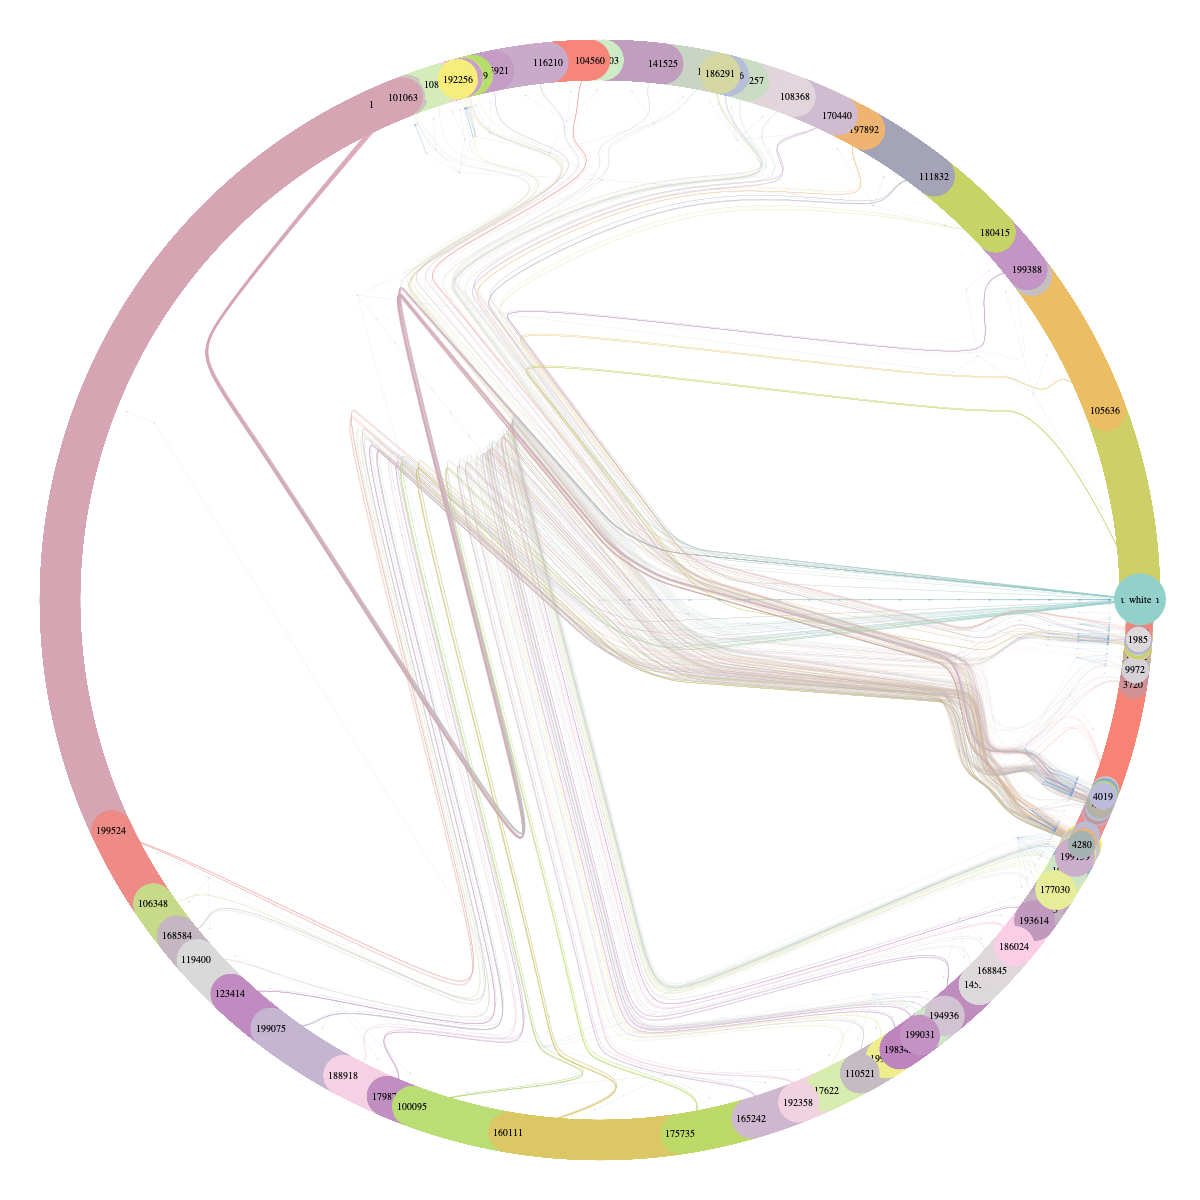

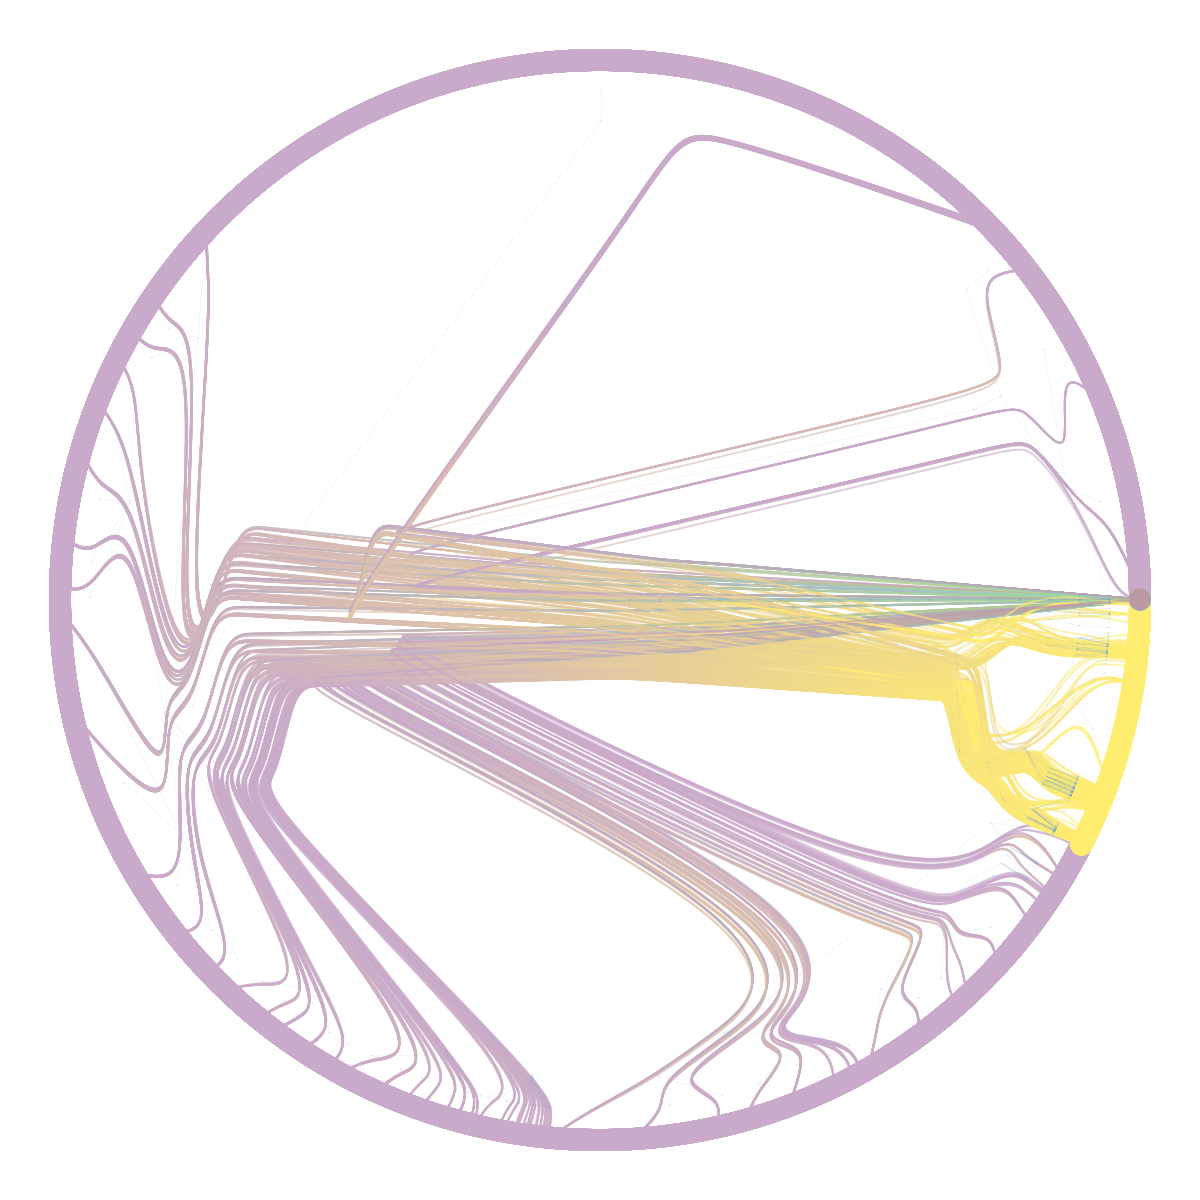

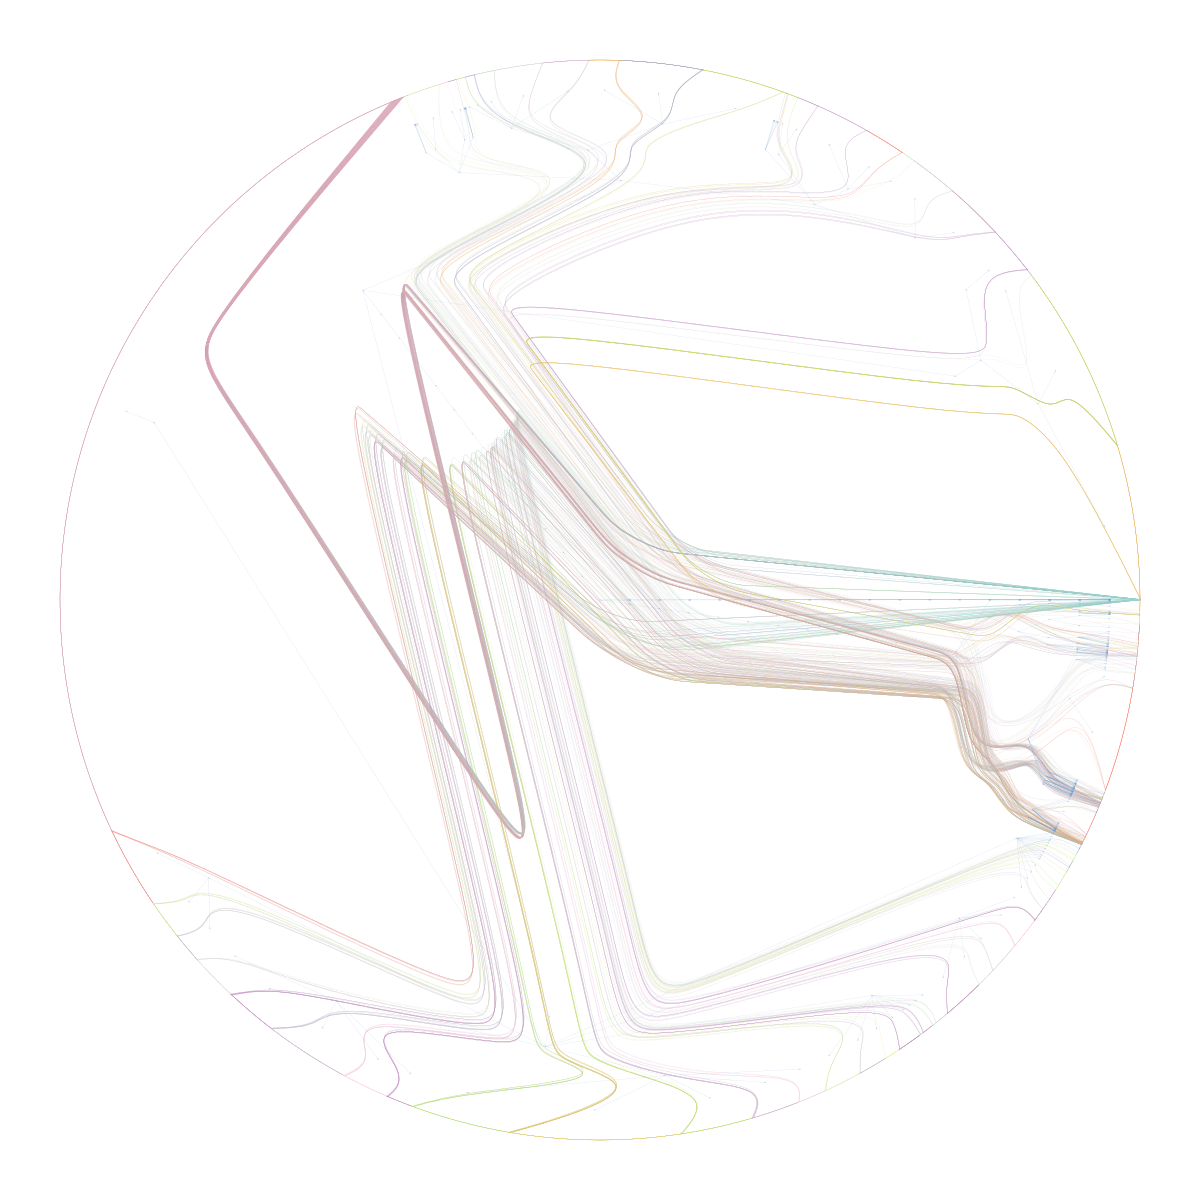

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ece1550, at 0x16ed381c0>,
 <Graph object, directed, with 47913 vertices and 47912 edges, at 0x16ec50d90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ec50d90, at 0x16ec50c40>)

In [169]:
gt.draw_hierarchy(model1.state, subsample_edges=1000,vertex_text=model1.g.vp['name'],vertex_font_size= 5,bg_color='w')
gt.draw_hierarchy(model1.state, subsample_edges=1000,bg_color='w',vertex_color=model1.g.vp.kind,vertex_size=10,vertex_fill_color=model1.g.vp.kind)
gt.draw_hierarchy(model1.state, subsample_edges=1000)


In [126]:
b = np.loadtxt("56115GoodGrouping/groups/level0.csv")
b = b.astype(int)


# print(b)
g = gt.load_graph("56115GoodGrouping/graph.gt.gz")
print(g)

<Graph object, undirected, with 47515 vertices and 502792 edges, 2 internal vertex properties, at 0x164a0f4f0>


find node group

In [125]:

icdCode="2780"

for v in g.vertices():
    if(g.vp.kind[v]==1):
        # print(v,g.vp.name[v])
        if(g.vp.name[v]==icdCode):
            print(v,g.vp.name[v])



37 2780


lookup node group

In [127]:
print(b[37])

3794


In [129]:
#  np.where(model.state.get_bs()[0]==43986)[0]
np.where(b==3794)[0]

# print(type(model.state.get_bs()[0][0]),model.state.get_bs()[0][0])
# print(type(b[0]),b[0])
# print(type(43986),43986)

array([  37,  286,  717, 1393, 1967, 2191, 3308, 4501, 4533, 5028, 5177])

In [160]:

groupICDlist = []

print("group:",3794)
for i in np.where(b==3794)[0]:
    print(g.vp.name[i],search(str(g.vp.name[i])))

    groupICDlist.append(g.vp.name[i])

print("group:",523)
for i in np.where(b==523)[0]:
    print(g.vp.name[i],search(str(g.vp.name[i])))



group: 3794
2780 2780:Overweight and obesity:None
3272 3272:Organic sleep apnea:None
6078 6078:Other specified disorders of penis:None
4571 4571:Other lymphedema:Other lymphedema
5641 5641:Irritable bowel syndrome:Irritable bowel syndrome
6953 6953:Rosacea:Rosacea
6960 6960:Psoriatic arthropathy:Psoriatic arthropathy
7287 7287:Other fibromatoses of muscle ligament and fascia:None
2114 2114:Benign neopl rectum/anus:Benign neoplasm of rectum and anal canal
4778 4778:Allergic rhinitis NEC:Allergic rhinitis due to other allergen
2788 2788:Other hyperalimentation:Other hyperalimentation
group: 523
4142 4142:Chr tot occlus cor artry:Chronic total occlusion of coronary artery
4140 4140:Coronary atherosclerosis:None
412 412:Old myocardial infarction:None
4241 4241:Aortic valve disorder:Aortic valve disorders
4263 4263:Left bb block NEC:Other left bundle branch block
4400 4400:Aortic atherosclerosis:Atherosclerosis of aorta
3968 3968:Mitr/aortic mult involv:Multiple involvement of mitral and ao

Building ICD9 to 10 dictionary

In [134]:
lines = []
with open("icd9to10dictionary.txt") as f:
    for line in f:
        lines.append(line)

# x = lines[0].split("|")[0:2]
icd9and10 = []
for l in lines:
    x = l.split("|")[0:2]
    # print(type(x))
    # print(type(x[0]))
    x[0] = x[0].replace('.', '')
    x[0]=x[0][0:4]
    icd9and10.append(x)

icd9to10 = {}
for icd9,icd10 in icd9and10:
    icd9to10[icd9]=icd10



Using Healthcare Cost and Utilization Project) to get Elixhauser 

In [156]:
from icd9cms.icd9 import search

import json
from hcuppy.ccs import CCSEngine
ce = CCSEngine(mode="dx")
out = ce.get_ccs(["E119", "I10"])

codes = [2780,
3272,
6078,
4571,
5641,
6953,
6960,
7287,
2114,
4778,
2788]

for c in codes:
    # print(i,type(i))
    # print(model.g.vp.name[i])
    print(search(str(c)))
    # print(type(c),c,list(icd9to10.keys())[0],type(list(icd9to10.keys())[0]))
    if str(c) in icd9to10.keys():
        icd10=icd9to10[str(c)]
        print(icd10)
        out = ce.get_ccs([icd10])
        print(json.dumps(out, indent=2))


2780:Overweight and obesity:None
E66.2
[
  {
    "ccs": "58",
    "ccs_desc": "Other nutritional; endocrine; and metabolic disorders",
    "ccs_lv1": "3",
    "ccs_lv1_desc": "Endocrine; nutritional; and metabolic diseases and immunity disorders",
    "ccs_lv2": "3.11",
    "ccs_lv2_desc": "Other nutritional; endocrine; and metabolic disorders [58.]"
  }
]
3272:Organic sleep apnea:None
G47.39
[
  {
    "ccs": "259",
    "ccs_desc": "Residual codes; unclassified",
    "ccs_lv1": "18",
    "ccs_lv1_desc": "Residual codes; unclassified; all E codes [259. and 260.]",
    "ccs_lv2": "",
    "ccs_lv2_desc": ""
  }
]
6078:Other specified disorders of penis:None
N48.5
[
  {
    "ccs": "166",
    "ccs_desc": "Other male genital disorders",
    "ccs_lv1": "10",
    "ccs_lv1_desc": "Diseases of the genitourinary system",
    "ccs_lv2": "10.2",
    "ccs_lv2_desc": "Diseases of male genital organs"
  }
]
4571:Other lymphedema:Other lymphedema
I89.0
[
  {
    "ccs": "121",
    "ccs_desc": "Other dis

In [133]:
for group in np.unique(b):
    print(group,np.count_nonzero(b==group))



290 934
434 22
523 7
602 2
729 16
1057 111
1076 23
1088 19
1196 4
2625 205
3082 1
3452 8
3794 11
3805 27
3814 10
3834 853
4182 211
4653 10
4793 136
5228 10
6272 3
6830 30
6944 4
7061 6
7215 3
8047 483
8292 42
9044 7
9397 589
9879 947
10090 278
10342 276
10496 255
10546 2111
10557 50
12078 740
12726 3
13469 1
14127 481
14587 1436
15035 369
15119 134
15681 1434
15975 4
16056 43
16236 4
16248 422
16312 45
16349 63
16627 7
17118 15
17631 327
17640 11
17973 96
18312 16
18709 167
19060 31
19207 20
19226 4
19702 146
20180 14
20239 2872
20597 330
20630 30
20697 180
20724 5
21308 105
21446 26
21449 85
21525 222
21527 3
21529 481
22469 4
22718 49
22900 201
23552 562
23560 4
23634 11
23860 17
25538 144
26049 12
26490 380
26671 2
26674 1
27116 34
27729 94
28005 23
28516 141
28566 7
28569 259
28900 8
28964 42
29249 12
29273 236
29331 29
29479 1
29920 11
29936 6
30078 12
30088 8
30366 4
30488 27
30498 5
30622 2
30870 40
31396 29
31947 7
32143 340
32464 2
32789 81
32979 82
33023 262
33492 10
33734 5


Kinds of nodes in each group

In [139]:
b = np.loadtxt("56115GoodGrouping/groups/level0.csv")
print(b)
g = gt.load_graph("56115GoodGrouping/graph.gt.gz")
print(g)



nKind = {}

for bNum in np.unique(b):
    nKind[bNum]=set()

for v in g.vertices():
    if(g.vp.kind[v]==2):  
        print(v,g.vp.name[v],b[int(v)])

for v in g.vertices():
    if(g.vp.kind[v]==3):  
        print(v,g.vp.name[v],b[int(v)])
for v in g.vertices():
    if(g.vp.kind[v]==4):  
        print(v,g.vp.name[v],b[int(v)])


for v,group in enumerate(b):
    nKind[group].add(g.vp.kind[v])

print(nKind)

[41596.  4653. 46847. ... 42371. 40624. 20239.]
<Graph object, undirected, with 47515 vertices and 502792 edges, 2 internal vertex properties, at 0x16ed4dca0>
{290.0: {0}, 434.0: {1}, 523.0: {1}, 602.0: {1}, 729.0: {1}, 1057.0: {0}, 1076.0: {1}, 1088.0: {1}, 1196.0: {1}, 2625.0: {1}, 3082.0: {1}, 3452.0: {0}, 3794.0: {1}, 3805.0: {1}, 3814.0: {1}, 3834.0: {0}, 4182.0: {0}, 4653.0: {1}, 4793.0: {0}, 5228.0: {1}, 6272.0: {1}, 6830.0: {1}, 6944.0: {1}, 7061.0: {1}, 7215.0: {1}, 8047.0: {0}, 8292.0: {1}, 9044.0: {1}, 9397.0: {0}, 9879.0: {0}, 10090.0: {0}, 10342.0: {0}, 10496.0: {0}, 10546.0: {0}, 10557.0: {1}, 12078.0: {0}, 12726.0: {1}, 13469.0: {1}, 14127.0: {0}, 14587.0: {0}, 15035.0: {0}, 15119.0: {1}, 15681.0: {0}, 15975.0: {1}, 16056.0: {1}, 16236.0: {1}, 16248.0: {0}, 16312.0: {0}, 16349.0: {0}, 16627.0: {1}, 17118.0: {0}, 17631.0: {0}, 17640.0: {1}, 17973.0: {1}, 18312.0: {1}, 18709.0: {0}, 19060.0: {1}, 19207.0: {1}, 19226.0: {1}, 19702.0: {0}, 20180.0: {1}, 20239.0: {0}, 20597.0

count per group

In [118]:
# count = []
# for bNum in np.unique(b):
#     print(bNum,np.count_nonzero(b==bNum))
#     count.append(np.count_nonzero(b==bNum))
# print(np.sum(count))


print(np.size(np.unique(b)))
print(model.state)

214
<NestedBlockState object, with base <BlockState object with 47402 blocks (214 nonempty), for graph <Graph object, undirected, with 47515 vertices and 502792 edges, 2 internal vertex properties, at 0x16ecf1520>, at 0x16ecf1940>, and 7 levels of sizes [(47515, 214), (214, 42), (42, 11), (11, 5), (5, 3), (3, 2), (2, 1)] at 0x16ed28640>
